1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [22]:
from scipy.stats import poisson

probab = 1-poisson.cdf(k=15., mu=6.3)

print("Probability that in a single year are observed 15 or more hurricances : {}".format(probab))


Probability that in a single year are observed 15 or more hurricances : 0.0008444930803583883


Probability that in a single year are observed 15 or more hurricances : 0.0008444930803583883
Z = 2.9


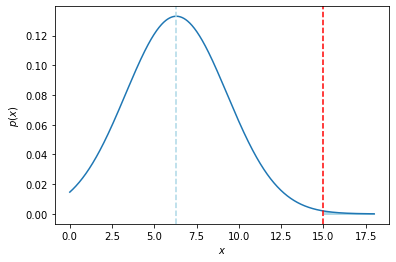

In [1]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


from scipy.stats import poisson

probab = 1-poisson.cdf(k=15., mu=6.3)

print("Probability that in a single year are observed 15 or more hurricances : {}".format(probab))

x0 = 15.
mu = 6.3
sigma = 3.

# determine the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)

# plot the measurement and its assumed pdf
w = 15-mu 
x = np.linspace(0, 18, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=x >= 15, color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T value:  -3.786997938137629


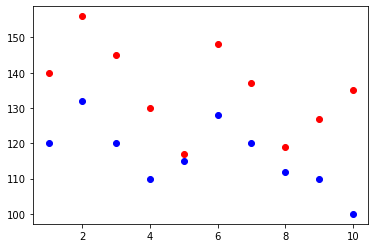

p-value = 0.004302464132864604
Since the p-value 0.004 is  < 𝛼/2(0.05) , we don't accept the null hypothesis.


In [5]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
#mean
pre_mean = np.mean(pre)
post_mean = np.mean(post)
#N size of datasets
n = len(pre)

#variance
sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)

T = (pre_mean - post_mean) / (sigma * np.sqrt(2/n))
print("T value: ",T)

plt.figure()
plt.plot(range(1,11), pre, 'bo')
plt.plot(range(1,11), post, 'ro')
plt.show()

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

#Since the p-value 0.004 is  <𝛼/2 , we don't accept the null hypothesis.
print("Since the p-value 0.004 is  < 𝛼/2(0.05) , we don't accept the null hypothesis.")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

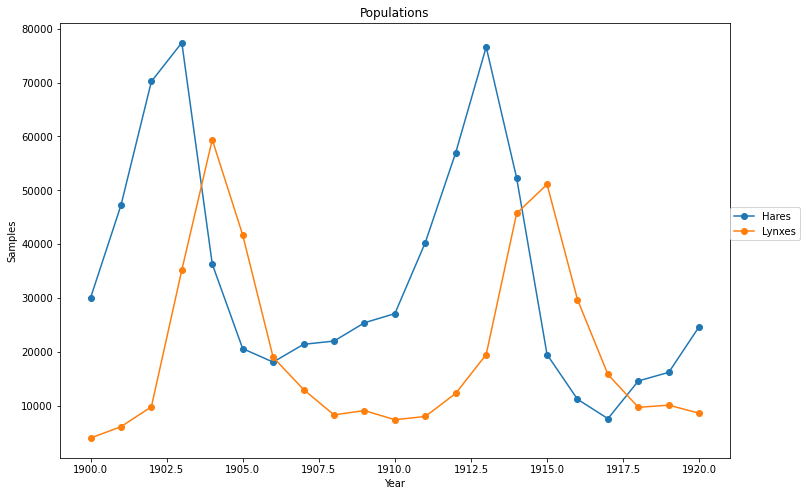

Population period:  10.5


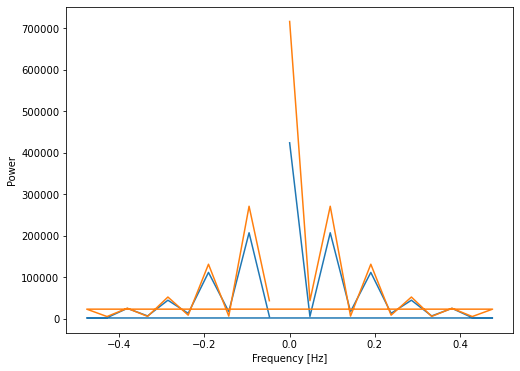

In [38]:
data = np.loadtxt('data/populations.txt')
from scipy import fftpack
import numpy as np
from matplotlib import pyplot as plt

#loading data from file
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T

fig = plt.figure(figsize = (12, 8))
plt.plot(year, hares, '-o', year, lynxes, '-o')
plt.title('Populations')
plt.xlabel('Year')
plt.ylabel('Samples')
plt.legend( ('Hares', 'Lynxes'), loc=(1.00, 0.5) )
plt.show()

lpop_fft = fftpack.fft(lynxes)
hpop_fft = fftpack.fft(hares)

t_step = 1 #year
lsample_freq = fftpack.fftfreq(lynxes.size, d=t_step)
lpower = np.abs(lpop_fft)
hsample_freq = fftpack.fftfreq(hares.size, d=t_step)
hpower = np.abs(hpop_fft)

plt.figure(figsize=(8, 6))
plt.plot(lsample_freq, lpower,hsample_freq, hpower)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

pos_mask = np.where(lsample_freq > 0)
freqs = lsample_freq[pos_mask]
powes = lpower[pos_mask]
# find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Population period: ", 1/peak_freq) #Hares have the same peak frequency


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

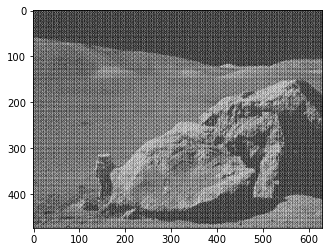

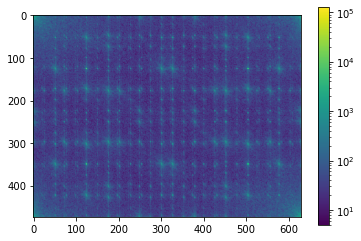

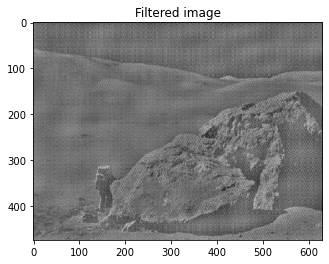

In [34]:
#Import the image as a 2D numpy array using 
from scipy import fftpack
array = plt.imread("data/moonlanding.png")
#Examine the image with plt.imshow()
plt.imshow(array, cmap='gray')
plt.show()
#Plot the spectrum
image_fft = fftpack.fft2(array)
spectrum = np.abs(image_fft)
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(spectrum, norm=LogNorm(vmin=5))
plt.colorbar()
plt.show()

#Use array slicing to set the noise regions to zero.
image_fft = np.where(np.abs(image_fft) > 1200, 0 , image_fft)

#Apply the inverse Fourier transform to plot the resulting image.
img_filtered = fftpack.ifft2(image_fft).real
plt.imshow(img_filtered,cmap='gray')
plt.title("Filtered image")
plt.show()
